<a href="https://colab.research.google.com/github/pallavibekal/IISC-CDS-Python/blob/main/CDS_IISC_B2_20210530_Data_Munging_pandas_matplotlip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!head ghw.csv

Gender,Height,Weight
"Male",73.84701702,241.8935632
"Male",68.78190405,162.3104725
"Male",74.11010539,212.7408556
"Male",71.7309784,220.0424703
"Male",69.88179586,206.3498006
"Male",67.25301569,152.2121558
"Male",68.78508125,183.9278886
"Male",68.34851551,167.9711105
"Male",67.01894966,175.9294404


In [2]:
!tail ghw.csv

"Female",63.17949825,141.2660996
"Female",62.63667493,102.8535632
"Female",62.07783169,138.6916803
"Female",60.03043377,97.68743226
"Female",59.09825003,110.5296857
"Female",66.17265215,136.7774542
"Female",67.06715465,170.8679059
"Female",63.86799221,128.4753188
"Female",69.03424313,163.8524613
"Female",61.94424588,113.6491027


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("ghw.csv")

In [6]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [12]:
data[data.Gender == 'Male']['Gender'].count()

5000

In [13]:
data["Height"]

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [15]:
data.Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [17]:
INCHES2CM, POUNDS2KG = 2.54, 0.454
def inches2cm(s: str) -> int:
  return int(float(s) * INCHES2CM + 0.5)
def pounds2kg(s: str) -> int:
  return int(float(s) * POUNDS2KG +0.5)


In [33]:
data = pd.read_csv("ghw.csv", converters={"Height": inches2cm, "Weight": pounds2kg})

In [19]:
data

,Gender,Height,Weight
0,Male,188,110
1,Male,175,74
2,Male,188,97
3,Male,182,100
4,Male,177,94
...,...,...,...
9995,Female,168,62
9996,Female,170,78
9997,Female,162,58
9998,Female,175,74


In [20]:
tall = data[data.Height > 175]

In [21]:
tall.describe()

,Height,Weight
count,2570.000000,2570.000000
mean,181.073541,90.603502
std,4.278050,6.963201
min,176.000000,67.000000
25%,178.000000,86.000000
50%,180.000000,90.000000
75%,183.000000,95.000000
max,201.000000,123.000000


In [22]:
heavy = data[data.Weight > 100]

In [23]:
heavy.describe()

,Height,Weight
count,197.000000,197.000000
mean,189.065990,104.451777
std,4.199212,3.801713
min,178.000000,101.000000
25%,186.000000,102.000000
50%,189.000000,103.000000
75%,192.000000,105.000000
max,201.000000,123.000000


In [24]:
male = data[data.Gender == 'Male']

In [38]:
female = data[data.Gender == 'Female']

In [26]:
tallman = data[(data.Gender == 'Male') & (data.Height > 180)]

In [27]:
tallman.describe()

,Height,Weight
count,1213.000000,1213.000000
mean,184.646331,94.794724
std,3.485386,5.952222
min,181.000000,79.000000
25%,182.000000,91.000000
50%,184.000000,94.000000
75%,187.000000,98.000000
max,201.000000,123.000000


In [28]:
data = pd.read_csv("ghw.csv", header=0, names=["MF", "HT", "WT"], converters={"HT": inches2cm, "WT": pounds2kg})

In [29]:
data.describe()

,HT,WT
count,10000.000000,10000.000000
mean,168.569100,73.294000
std,9.781605,14.573867
min,138.000000,29.000000
25%,161.000000,62.000000
50%,168.000000,73.000000
75%,176.000000,85.000000
max,201.000000,123.000000


In [30]:
tallman.to_csv("tallman.csv")

In [31]:
import matplotlib.pyplot as plt

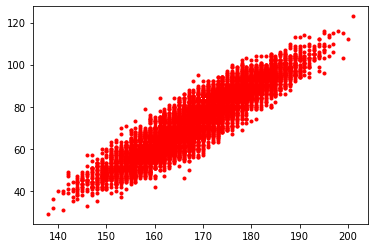

In [34]:
plt.plot(data.Height, data.Weight, "r.")

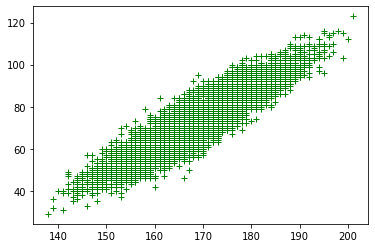

In [35]:
plt.plot(data.Height, data.Weight, "g+")

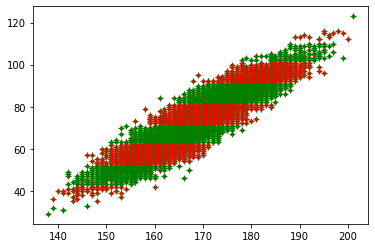

In [36]:
plt.plot(data.Height, data.Weight, "r.")
plt.plot(data.Height, data.Weight, "g+")
plt.show()

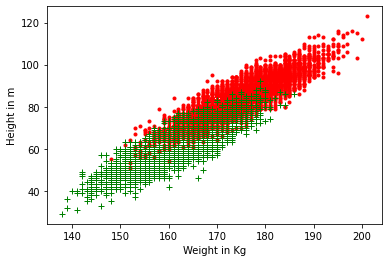

In [43]:
plt.plot(male.Height, male.Weight, "r.")
plt.plot(female.Height, female.Weight, "g+")
plt.xlabel('Weight in Kg')
plt.ylabel('Height in m')
plt.savefig("sample.png")
plt.show()